# Demo-2: Spatial Selectivity from Combined effect of Field Gradient Pulse and RF Pulse. 

In [33]:
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
from pprint import pprint
from copy import deepcopy

import SpSpSelectivity


As we all know, given a homogeneous RF field in real space, the whole sample is uniformly excited, since there is no difference throughout the sample.

If we want a selective excitation upon a part of the sample, we need to create an artificial environment that makes the region-of-interest dicernable from the rest of the sample.

The traditional way is to generate an encoding between spatial coordinate and the strength of magnetic field. We adopt a simple case where there is only one spatial coordinate.

Let's start by revisiting the 1 ms Gaussian pulse

0.003367090077063996 0.3987479744270368 118.42509861652806 15.989435673179225


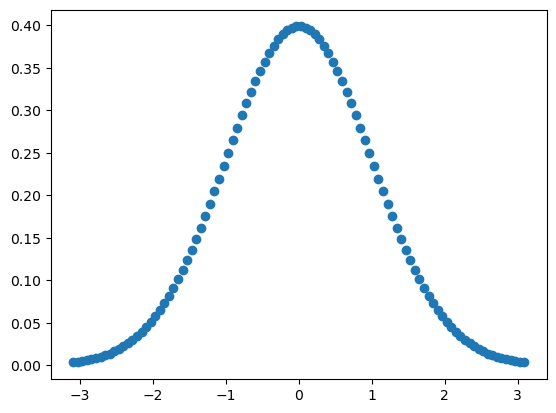

In [3]:
cutoff = 0.001
x = np.linspace(scipy.stats.norm.ppf(cutoff),
                scipy.stats.norm.ppf(1-cutoff), 100)
gauss_x = scipy.stats.norm.pdf(x)
plt.scatter(x, gauss_x)

print(gauss_x[0], gauss_x[50], gauss_x[50]/gauss_x[0], np.sum(gauss_x))

3917.285552469754


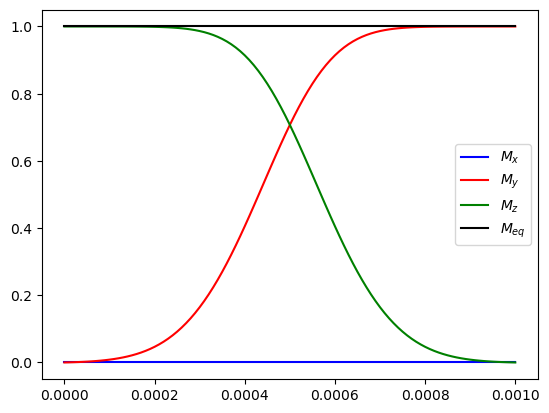

In [6]:
T_1 = 1             # sec
R_1 = 0  # 1 / T_1       # s^-1
T_2 = 0.05          # sec
R_2 = 0  # 1 / T_2       # s^-1
deltaOmegaZ = 0     # rad
omega1Y = 0         # rad
omega1X = 250 * 2 * np.pi       # rad
nSteps = int(1e2)
tau = 1e-3             # sec
dTau = tau/nSteps    # sec
dTauList = np.linspace(start=0, stop=tau, num=nSteps+1, endpoint=True)

M_0T = np.array([[0, 0, 1, 1]])
M_0 = M_0T.T


gauss_x /= np.max(gauss_x)
gauss_x *= len(gauss_x) / np.sum(gauss_x) * 250 * 2 * np.pi
print(np.max(gauss_x))

tmpTraj = SpSpSelectivity.solveBlochRfWaveformTraj(
    initialState=M_0, rfwaveformX=gauss_x, rfwaveformY=(gauss_x*0), Tau=1e-3)
dTauRange = np.linspace(start=0, stop=1e-3, num=(1+len(gauss_x)))

plt.figure()
plt.plot(dTauRange, tmpTraj[:, 0], color='blue', label='$M_x$')
plt.plot(dTauRange, tmpTraj[:, 1], color='red', label='$M_y$')
plt.plot(dTauRange, tmpTraj[:, 2], color='green', label='$M_z$')
plt.plot(dTauRange, tmpTraj[:, 3], color='black', label='$M_{eq}$')

# plt.hlines(y=.5,xmax=500,xmin=-500,linestyles='dashed',color='grey')

# plt.vlines(x=1000,ymax=1.1,ymin=-1.1,linestyles='dashed',color='grey')
# plt.vlines(x=-1000,ymax=1.1,ymin=-1.1,linestyles='dashed',color='grey')


plt.legend(loc='best')
plt.show()

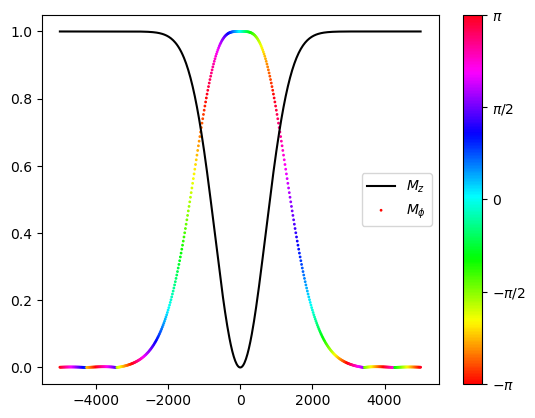

In [125]:
deltaOmegaZRange = np.linspace(start=-5000, stop=5000, num=501, endpoint=True)

offsetSweepTraj = []

for freqOffset in deltaOmegaZRange:
    overallPropagator = SpSpSelectivity.solveBlochRfWaveformOverallPropagator(
        rfwaveformX=gauss_x, rfwaveformY=(gauss_x*0), offsetZ=freqOffset*2*np.pi, Tau=1e-3)

    offsetSweepTraj.append(np.dot(overallPropagator, M_0))
offsetSweepTraj = np.asarray(offsetSweepTraj)

M_z = offsetSweepTraj[:, 2]
M_trans = offsetSweepTraj[:, 1] - offsetSweepTraj[:, 0] * 1j

plt.figure()
plt.plot(deltaOmegaZRange, M_z,                     color='black', label='$M_z$')
plt.scatter(deltaOmegaZRange, np.abs(M_trans),         s=1, c=np.angle(M_trans), cmap='hsv', label='$M_{\phi}$')

cbar = plt.colorbar( ticks=[-(np.pi-0.01), -np.pi/2, 0, np.pi/2, np.pi-0.01])
cbar.ax.set_yticklabels(['$-\pi$', '$-\pi/2$','0', '$\pi/2$','$\pi$'])  # vertically oriented colorbar
plt.legend(loc='best')
plt.show()

In [123]:
a = os.urandom(2)
print(a)
print(a.hex())
print(int(a.hex(), 16))
print(bin((int(a.hex(), 16))))



b'kB'
6b42
27458
0b110101101000010
